In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pickle
from sklearn import metrics
pd.set_option('display.max_columns', None)

In [16]:
# load preprocessed data
file_path = 'C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/data_all_reset.csv'

# Read the CSV file into a dataframe
data_all_reset = pd.read_csv(file_path)
data_all_reset

,Particle ID,Area (ABD),Area (Filled),Aspect Ratio,Average Blue,Average Green,Average Red,Calibration Factor,Calibration Image,Camera,Capture X,Capture Y,Ch1 Area,Ch1 Peak,Ch1 Width,Ch2 Area,Ch2 Peak,Ch2 Width,Ch2/Ch1 Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter,Convexity,Date,Diameter (ABD),Diameter (ESD),Diameter (FD),Edge Gradient,Elapsed Time,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Filter Score,Geodesic Aspect Ratio,Geodesic Length,Geodesic Thickness,Image File,Image Height,Image Width,Image X,Image Y,Intensity,Length,Original Reference ID,Particles Per Chain,Perimeter,Ratio Blue/Green,Ratio Red/Blue,Ratio Red/Green,Roughness,Scatter Area,Scatter Peak,Scatter Width,Sigma Intensity,Source Image,Sphere Complement,Sphere Count,Sphere Unknown,Sphere Volume,Sum Intensity,Symmetry,Time,Timestamp,Transparency,Volume (ABD),Volume (ESD),Width,Class,path
0,1,225.6288,242.5331,0.7807,103.6006,108.9748,111.5660,0.7075,1,1,478,885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6528,0.7207,0.8890,1.3876,67.8397,0.9575,2023-07-07,16.9493,20.1441,17.5728,61.5870,1.688,1.8052,45.0,-45.0,0.0749,0.9304,0.0,0.5540,24.7150,13.6911,NELU-C2-10x_000001.tif,37,34,0,0,107.6777,22.9938,4C7B7810-460E-4A30-A499-EAD2BF8B789B,1,76.8122,0.9507,1.0769,1.0238,1.1323,0.0,0.0,0.0,22.8898,32,0.0,0,0.0,0.0,68483.0,0.6080,10:46:13,2023-07-07T10:46:13.597,0.1586,2549.5040,4279.983,17.3338,WRONG,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
1,2,58.4998,58.8657,0.6323,103.9087,115.0776,118.6621,0.7075,1,1,861,541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5818,0.3583,0.7126,2.7910,44.0031,0.7692,2023-07-07,8.6304,12.5188,8.6574,60.0400,1.688,6.6170,-85.0,0.0,0.7746,0.5635,0.0,0.1511,26.9941,4.0795,NELU-C2-10x_000001.tif,29,23,36,0,112.1370,15.2112,CB5DBFBA-91B3-49D0-9F3F-40D0F3135833,1,62.1472,0.9029,1.1420,1.0311,1.4123,0.0,0.0,0.0,9.8916,32,0.0,0,0.0,0.0,24558.0,0.4728,10:46:13,2023-07-07T10:46:13.597,0.3106,336.5858,1027.280,10.2588,WRONG,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
2,3,173.9068,176.7952,0.4683,113.4023,124.5566,127.6934,0.7075,1,1,221,1391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4288,0.3191,0.7033,3.1334,66.3636,0.8405,2023-07-07,14.8804,19.6135,15.0034,51.7025,1.735,7.7141,-70.0,20.0,0.7824,0.5610,0.0,0.1296,44.7665,5.8032,NELU-C2-10x_000001.tif,40,34,61,0,121.5781,25.1163,8777DAD3-5004-4A14-866F-1C43EE9BD1A2,1,101.1395,0.9104,1.1260,1.0252,1.5240,0.0,0.0,0.0,17.2754,33,0.0,0,0.0,0.0,62248.0,0.5822,10:46:13,2023-07-07T10:46:13.649,0.2413,1725.1970,3950.591,11.6738,WRONG,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
3,4,90.9054,90.9054,0.2330,79.6361,87.9016,91.2787,0.7075,1,1,654,509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1823,0.4398,0.4225,2.2739,59.0858,1.0000,2023-07-07,10.7585,17.3534,10.7585,159.7470,1.735,4.9412,15.0,-75.0,0.0636,0.9402,0.0,0.2024,27.4659,5.5585,NELU-C2-10x_000001.tif,20,43,97,0,85.8197,25.8238,458E8477-C0C7-4C20-8E2C-586257868DC1,1,66.0489,0.9060,1.1462,1.0384,1.1178,0.0,0.0,0.0,21.0279,33,0.0,0,0.0,0.0,26175.0,0.6954,10:46:13,2023-07-07T10:46:13.649,0.3800,652.0009,2736.230,4.5987,NELU,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
4,5,27.1872,27.1872,0.5611,132.4884,137.3721,138.3876,0.7075,1,1,599,1756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4863,0.1680,0.4172,5.9518,40.4736,0.5233,2023-07-07,5.8835,11.4183,5.8835,21.5500,1.782,16.6380,-10.0,-80.0,1.1548,0.4641,0.0,0.0601,32.7772,1.9700,NELU-C2-10x_000001.tif,21,30,142,0,136.0155,15.2112,75A12674-70A3-4CF8-A84C-7118003B215F,2,69.4945,0.9644,1.0445,1.0074,1.7170,0.0,0.0,0.0,4.8224,34,0.0,0,0.0,0.0,17546.0,0.5765,10:46:13,2023-07-07T10:46:13.700,0.4847,106.6374,779.469,7.4287,WRONG,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166513,6770,45.9070,48.0345

## Remove unnessecary columns

In [17]:
columns_to_drop = [
    'Particle ID',
                   'Average Blue', 'Average Green', 'Average Red','Calibration Factor','Calibration Image','Camera', 'Capture X', 'Capture Y', 'Ch1 Area', 'Ch1 Peak', 'Ch1 Width', 'Ch2 Area', 'Ch2 Peak', 'Ch2 Width', 'Ch2/Ch1 Ratio', 'Date', 'Ratio Blue/Green','Ratio Red/Blue', 'Ratio Red/Green','Date','Elapsed Time', 'Filter Score', 
    'Image File', 
                    'Original Reference ID', 'Scatter Area', 'Scatter Peak', 'Scatter Width', 'Source Image', 'Sphere Complement', 'Sphere Count', 'Sphere Unknown', 'Sphere Volume','Time', 'Timestamp',
    'path']

data_wrong= data_all_reset.drop(columns=columns_to_drop)

In [18]:
print(data_wrong[data_wrong.Class == 'ANCR'].shape[0])
print(data_wrong[data_wrong.Class == 'NELU'].shape[0])
print(data_wrong[data_wrong.Class == 'TRSP'].shape[0])
print(data_wrong[data_wrong.Class == 'ANLO'].shape[0])
print(data_wrong[data_wrong.Class == 'TEMA'].shape[0])
print(data_wrong[data_wrong.Class == 'LUCU'].shape[0])

1612
1918
1503
997
1835
3679


In [19]:
data_wrong.Class.unique()
data_wrong

,Area (ABD),Area (Filled),Aspect Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter,Convexity,Diameter (ABD),Diameter (ESD),Diameter (FD),Edge Gradient,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Geodesic Aspect Ratio,Geodesic Length,Geodesic Thickness,Image Height,Image Width,Image X,Image Y,Intensity,Length,Particles Per Chain,Perimeter,Roughness,Sigma Intensity,Sum Intensity,Symmetry,Transparency,Volume (ABD),Volume (ESD),Width,Class
0,225.6288,242.5331,0.7807,0.6528,0.7207,0.8890,1.3876,67.8397,0.9575,16.9493,20.1441,17.5728,61.5870,1.8052,45.0,-45.0,0.0749,0.9304,0.5540,24.7150,13.6911,37,34,0,0,107.6777,22.9938,1,76.8122,1.1323,22.8898,68483.0,0.6080,0.1586,2549.5040,4279.983,17.3338,WRONG
1,58.4998,58.8657,0.6323,0.5818,0.3583,0.7126,2.7910,44.0031,0.7692,8.6304,12.5188,8.6574,60.0400,6.6170,-85.0,0.0,0.7746,0.5635,0.1511,26.9941,4.0795,29,23,36,0,112.1370,15.2112,1,62.1472,1.4123,9.8916,24558.0,0.4728,0.3106,336.5858,1027.280,10.2588,WRONG
2,173.9068,176.7952,0.4683,0.4288,0.3191,0.7033,3.1334,66.3636,0.8405,14.8804,19.6135,15.0034,51.7025,7.7141,-70.0,20.0,0.7824,0.5610,0.1296,44.7665,5.8032,40,34,61,0,121.5781,25.1163,1,101.1395,1.5240,17.2754,62248.0,0.5822,0.2413,1725.1970,3950.591,11.6738,WRONG
3,90.9054,90.9054,0.2330,0.1823,0.4398,0.4225,2.2739,59.0858,1.0000,10.7585,17.3534,10.7585,159.7470,4.9412,15.0,-75.0,0.0636,0.9402,0.2024,27.4659,5.5585,20,43,97,0,85.8197,25.8238,1,66.0489,1.1178,21.0279,26175.0,0.6954,0.3800,652.0009,2736.230,4.5987,NELU
4,27.1872,27.1872,0.5611,0.4863,0.1680,0.4172,5.9518,40.4736,0.5233,5.8835,11.4183,5.8835,21.5500,16.6380,-10.0,-80.0,1.1548,0.4641,0.0601,32.7772,1.9700,21,30,142,0,136.0155,15.2112,2,69.4945,1.7170,4.8224,17546.0,0.5765,0.4847,106.6374,779.469,7.4287,WRONG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166513,45.9070,48.0345,0.3670,0.2740,0.0939,0.3485,10.6525,51.2507,0.6013,7.6453,14.8968,7.8204,88.2188,31.4339,30.0,-45.0,1.5338,0.3947,0.0318,54.6767,1.7394,29,32,874,237,132.8913,21.5787,1,112.8322,2.2016,41.5695,24452.0,0.2571,0.4868,234.0000,1730.000,6.7213,WRONG
166514,123.5345,148.5185,0.4621,0.0687,0.1154,0.2280,8.6680,111.7554,0.3446,12.5415,34.0975,13.7513,76.0245,25.1918,-60.0,35.0,0.6767,0.5964,0.0397,75.3290,2.9902,63,49,908,237,127.4201,44.9263,1,156.6384,1.4016,33.3056,49439.0,0.3158,0.6322,1030.0000,20800.000,19.4563,LUCU
166515,65.1297,74.1061,0.3652,0.1437,0.0691,0.2379,14.4640,79.3260,0.3534,9.1064,23.7602,9.7136,69.7368,43.4171,0.0,85.0,1.4472,0.4086,0.0230,75.3142,1.7347,28,52,959,237,137.3207,30.7763,1,154.0978,1.9426,36.2132,32545.0,0.2768,0.6167,395.0000,7020.000,12.3812,LUCU
166516,119.5490,150.5521,0.7210,0.4475,0.1002,0.3019,9.9814,90.5558,0.3790,12.3375,27.3370,13.8452,97.1787,29.3233,55.0,10.0,1.4840,0.4026,0.0341,81.7220,2.7869,48,42,1013,237,114.9074,32.8987,1,169.0178,1.8664,33.6843,43435.0,0.5084,0.5487,983.0000,10700.000,22.9938,LUCU


In [20]:
# drop all samples with label WRONG and Debris
data = data_wrong.drop(data_wrong[data_wrong.Class == 'WRONG'].index, inplace=False)
data

,Area (ABD),Area (Filled),Aspect Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter,Convexity,Diameter (ABD),Diameter (ESD),Diameter (FD),Edge Gradient,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Geodesic Aspect Ratio,Geodesic Length,Geodesic Thickness,Image Height,Image Width,Image X,Image Y,Intensity,Length,Particles Per Chain,Perimeter,Roughness,Sigma Intensity,Sum Intensity,Symmetry,Transparency,Volume (ABD),Volume (ESD),Width,Class
3,90.9054,90.9054,0.2330,0.1823,0.4398,0.4225,2.2739,59.0858,1.0000,10.7585,17.3534,10.7585,159.7470,4.9412,15.0,-75.0,0.0636,0.9402,0.2024,27.4659,5.5585,20,43,97,0,85.8197,25.8238,1,66.0489,1.1178,21.0279,26175.0,0.6954,0.3800,652.0009,2736.230,4.5987,NELU
10,99.4467,105.7104,0.2579,0.2432,0.5121,0.4734,1.9526,57.7139,1.0000,11.2525,16.8817,11.6015,178.0658,3.8763,-70.0,25.0,0.0271,0.9736,0.2580,25.7978,6.6552,40,26,382,0,92.5535,25.1163,1,64.9061,1.1246,23.1323,30265.0,0.7011,0.3334,746.0183,2519.126,5.3063,NELU
12,97.8874,162.3962,0.2688,0.1977,0.5287,0.4866,1.8914,67.9420,1.0000,11.1640,20.1441,14.3795,82.1064,3.6694,65.0,-20.0,0.0406,0.9610,0.2725,29.8159,8.1255,47,25,433,0,102.7802,28.6538,1,75.8828,1.1169,14.8035,33198.0,0.8101,0.4458,728.5412,4279.983,6.7213,NELU
14,96.3309,119.5490,0.3461,0.0668,0.1797,0.4486,5.5638,64.9977,0.8173,11.0748,19.2597,12.3375,70.5274,15.4143,70.0,-10.0,0.9827,0.5044,0.0649,54.0051,3.5036,46,21,490,0,124.2539,27.2387,1,115.0172,1.7696,10.6368,39637.0,0.4088,0.4250,711.2332,3740.664,6.7213,NELU
16,119.9470,127.1327,0.2175,0.1328,0.4584,0.4012,2.1816,66.4822,1.0000,12.3580,19.6921,12.7228,155.6742,4.6382,-30.0,65.0,0.0340,0.9671,0.2156,30.3598,6.5455,27,46,572,0,82.1029,29.3613,1,73.8106,1.1102,19.4487,31117.0,0.7542,0.3724,988.2064,3998.284,5.3063,NELU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166508,82.0731,95.1653,0.2817,0.1195,0.1569,0.2487,6.3741,80.2568,0.4573,10.2225,24.0943,11.0076,80.2180,17.9692,-80.0,5.0,0.5537,0.6436,0.0557,53.3131,2.9669,55,26,641,237,122.0426,34.3137,1,112.5601,1.4025,39.0471,34416.0,0.3658,0.5757,559.0000,7320.000,10.9663,LUCU
166512,112.0144,133.1521,0.5078,0.1658,0.0612,0.1536,16.3310,113.9731,0.2586,11.9424,34.8050,13.0205,85.3724,49.2850,-45.0,70.0,1.4358,0.4105,0.0203,100.8167,2.0456,53,65,807,237,123.0056,41.3888,1,205.7245,1.8050,32.7749,44159.0,0.4158,0.6569,892.0000,22100.000,24.4088,LUCU
166514,123.5345,148.5185,0.4621,0.0687,0.1154,0.2280,8.6680,111.7554,0.3446,12.5415,34.0975,13.7513,76.0245,25.1918,-60.0,35.0,0.6767,0.5964,0.0397,75.3290,2.9902,63,49,908,237,127.4201,44.9263,1,156.6384,1.4016,33.3056,49439.0,0.3158,0.6322,1030.0000,20800.000,19.4563,LUCU
166515,65.1297,74.1061,0.3652,0.1437,0.0691,0.2379,14.4640,79.3260,0.3534,9.1064,23.7602,9.7136,69.7368,43.4171,0.0,85.0,1.4472,0.4086,0.0230,75.3142,1.7347,28,52,959,237,137.3207,30.7763,1,154.0978,1.9426,36.2132,32545.0,0.2768,0.6167,395.0000,7020.000,12.3812,LUCU


In [21]:
print(data[data.Class == 'ANCR'].shape[0])
print(data[data.Class == 'NELU'].shape[0])
print(data[data.Class == 'TRSP'].shape[0])
print(data[data.Class == 'ANLO'].shape[0])
print(data[data.Class == 'TEMA'].shape[0])
print(data[data.Class == 'LUCU'].shape[0])
print(data[data.Class == 'DEBRIS'].shape[0])

1612
1918
1503
997
1835
3679
124249


In [22]:
data.Class.unique()

array(['NELU', 'DEBRIS', 'ANCR', 'TRSP', 'ANLO', 'TEMA', 'LUCU'],
      dtype=object)

In [23]:
data.head()

,Area (ABD),Area (Filled),Aspect Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter,Convexity,Diameter (ABD),Diameter (ESD),Diameter (FD),Edge Gradient,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Geodesic Aspect Ratio,Geodesic Length,Geodesic Thickness,Image Height,Image Width,Image X,Image Y,Intensity,Length,Particles Per Chain,Perimeter,Roughness,Sigma Intensity,Sum Intensity,Symmetry,Transparency,Volume (ABD),Volume (ESD),Width,Class
3,90.9054,90.9054,0.2330,0.1823,0.4398,0.4225,2.2739,59.0858,1.0000,10.7585,17.3534,10.7585,159.7470,4.9412,15.0,-75.0,0.0636,0.9402,0.2024,27.4659,5.5585,20,43,97,0,85.8197,25.8238,1,66.0489,1.1178,21.0279,26175.0,0.6954,0.3800,652.0009,2736.230,4.5987,NELU
10,99.4467,105.7104,0.2579,0.2432,0.5121,0.4734,1.9526,57.7139,1.0000,11.2525,16.8817,11.6015,178.0658,3.8763,-70.0,25.0,0.0271,0.9736,0.2580,25.7978,6.6552,40,26,382,0,92.5535,25.1163,1,64.9061,1.1246,23.1323,30265.0,0.7011,0.3334,746.0183,2519.126,5.3063,NELU
12,97.8874,162.3962,0.2688,0.1977,0.5287,0.4866,1.8914,67.9420,1.0000,11.1640,20.1441,14.3795,82.1064,3.6694,65.0,-20.0,0.0406,0.9610,0.2725,29.8159,8.1255,47,25,433,0,102.7802,28.6538,1,75.8828,1.1169,14.8035,33198.0,0.8101,0.4458,728.5412,4279.983,6.7213,NELU
14,96.3309,119.5490,0.3461,0.0668,0.1797,0.4486,5.5638,64.9977,0.8173,11.0748,19.2597,12.3375,70.5274,15.4143,70.0,-10.0,0.9827,0.5044,0.0649,54.0051,3.5036,46,21,490,0,124.2539,27.2387,1,115.0172,1.7696,10.6368,39637.0,0.4088,0.4250,711.2332,3740.664,6.7213,NELU
16,119.9470,127.1327,0.2175,0.1328,0.4584,0.4012,2.1816,66.4822,1.0000,12.3580,19.6921,12.7228,155.6742,4.6382,-30.0,65.0,0.0340,0.9671,0.2156,30.3598,6.5455,27,46,572,0,82.1029,29.3613,1,73.8106,1.1102,19.4487,31117.0,0.7542,0.3724,988.2064,3998.284,5.3063,NELU


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135793 entries, 3 to 166516
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Area (ABD)             135793 non-null  float64
 1   Area (Filled)          135793 non-null  float64
 2   Aspect Ratio           135793 non-null  float64
 3   Circle Fit             135793 non-null  float64
 4   Circularity            135793 non-null  float64
 5   Circularity (Hu)       135793 non-null  float64
 6   Compactness            135793 non-null  float64
 7   Convex Perimeter       135793 non-null  float64
 8   Convexity              135793 non-null  float64
 9   Diameter (ABD)         135793 non-null  float64
 10  Diameter (ESD)         135793 non-null  float64
 11  Diameter (FD)          135793 non-null  float64
 12  Edge Gradient          135793 non-null  float64
 13  Elongation             135793 non-null  float64
 14  Feret Angle Max        135793 non-null  f

In [27]:
data_stats = data.describe()
data_stats

,Area (ABD),Area (Filled),Aspect Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter,Convexity,Diameter (ABD),Diameter (ESD),Diameter (FD),Edge Gradient,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Geodesic Aspect Ratio,Geodesic Length,Geodesic Thickness,Image Height,Image Width,Image X,Image Y,Intensity,Length,Particles Per Chain,Perimeter,Roughness,Sigma Intensity,Sum Intensity,Symmetry,Transparency,Volume (ABD),Volume (ESD),Width
count,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,135793.000000,1.357930e+05,135793.000000,135793.000000,1.357930e+05,1.357930e+05,135793.000000
mean,165.821384,179.998886,0.439429,0.228001,0.204370,0.331414,10.931366,90.026702,0.540773,11.805689,27.191765,12.117720,39.599494,32.250945,-16.034258,-4.267009,0.941563,0.600150,0.106281,80.151640,3.304396,51.584971,44.418379,570.173632,849.539019,125.963791,36.783614,3.276156,166.912072,1.625127,8.610010,5.653812e+04,0.332025,0.517682,3.406531e+03,5.958661e+04,14.174459
std,432.457747,509.520215,0.234743,0.218786,0.191539,0.227338,13.612055,73.743863,0.232156,8.470923,23.473449,9.074312,28.416906,42.808887,55.141126,48.364361,0.852251,0.217011,0.184002,116.785409,2.545134,41.973330,33.484302,346.838595,540.393331,12.667375,32.628513,3.662123,233.339880,0.553843,7.796383,1.083349e+05,0.185330,0.154762,2.783208e+04,4.240420e+05,13.951845
min,6.257000,6.257000,0.010800,0.000000,0.003000,0.007800,1.000000,21.416000,0.044200,2.822500,5.325900,2.822500,6.100000,1.000000,-90.000000,-90.000000,0.000000,0.079900,0.001000,6.246100,0.836800,8.000000,7.000000,0.000000,0.000000,39.444400,6.013700,1.000000,24.984400,0.657200,0.832300,6.487000e+03,0.000000,0.025600,1.177357e+01,7.910034e+01,0.707500
25%,31.797700,32.131600,0.237800,0.009900,0.077200,0.178400,3.962900,49.350000,0.350700,6.362900,14.248300,6.396200,23.142900,10.353300,-70.000000,-45.000000,0.302000,0.421600,0.025900,29.564800,1.990200,29.000000,26.000000,275.000000,389.000000,120.288400,19.456300,1.000000,65.563400,1.234600,3.612000,1.873000e+04,0.193000,0.445000,1.348830e+02,1.514553e+03,5.306300
50%,79.406500,80.548100,0.404100,0.190400,0.147000,0.258900,6.800700,68.930200,0.493800,10.055000,20.478200,10.127000,29.990000,19.313300,-25.000000,0.000000,0.716700,0.582500,0.051800,47.176500,2.429000,40.000000,36.000000,566.000000,849.000000,128.682900,27.946200,2.000000,100.796100,1.448500,5.203200,3.298500e+04,0.308600,0.552300,5.322900e+02,4.496490e+03,10.258800
75%,141.219600,150.145100,0.625900,0.352800,0.252300,0.405800,12.955300,101.563100,0.707500,13.409200,30.874500,13.826500,44.402200,38.674300,30.000000,35.000000,1.371800,0.768000,0.096600,87.117100,3.320700,58.000000,51.000000,861.000000,1317.000000,134.950400,40.681200,4.000000,179.781200,1.870200,10.707500,5.363400e+04,0.437500,0.621600,1.262427e+03,1.540987e+04,18.041300
max,24439.501100,33684.443900,0.997700,0.956600,1.000000,1.000000,330.083900,1396.569600,1.000000,176.401100,443.170100,207.095100,239.781000,1034.988300,85.000000,85.000000,11.509500,1.549600,1.000000,3717.055300,49.629900,930.000000,603.000000,2007.000000,1960.000000,192.784200,651.961300,85.000000,7442.954800,9.283500,62.775000,6.049232e+06,1.000000,0.908000,2.874103e+06,4.557326e+07,310.946300


In [26]:
data_stats.to_csv('C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/data_stats_debris.csv', index=True)

## Drop missing data

In [63]:
data.isnull().sum()

Area (ABD)               0
Area (Filled)            0
Aspect Ratio             0
Circle Fit               0
Circularity              0
Circularity (Hu)         0
Compactness              0
Convex Perimeter         0
Convexity                0
Diameter (ABD)           0
Diameter (ESD)           0
Diameter (FD)            0
Edge Gradient            0
Elongation               0
Feret Angle Max          0
Feret Angle Min          0
Fiber Curl               0
Fiber Straightness       0
Geodesic Aspect Ratio    0
Geodesic Length          0
Geodesic Thickness       0
Image Height             0
Image Width              0
Image X                  0
Image Y                  0
Intensity                0
Length                   0
Particles Per Chain      0
Perimeter                0
Roughness                0
Sigma Intensity          0
Sum Intensity            0
Symmetry                 0
Transparency             0
Volume (ABD)             0
Volume (ESD)             0
Width                    0
C

#### -> no missing values

## Handle categorical data

In [64]:
print(data.dtypes)

Area (ABD)               float64
Area (Filled)            float64
Aspect Ratio             float64
Circle Fit               float64
Circularity              float64
Circularity (Hu)         float64
Compactness              float64
Convex Perimeter         float64
Convexity                float64
Diameter (ABD)           float64
Diameter (ESD)           float64
Diameter (FD)            float64
Edge Gradient            float64
Elongation               float64
Feret Angle Max          float64
Feret Angle Min          float64
Fiber Curl               float64
Fiber Straightness       float64
Geodesic Aspect Ratio    float64
Geodesic Length          float64
Geodesic Thickness       float64
Image Height               int64
Image Width                int64
Image X                    int64
Image Y                    int64
Intensity                float64
Length                   float64
Particles Per Chain        int64
Perimeter                float64
Roughness                float64
Sigma Inte

#### no categorical data apart from class label

# Train-Test split 

In [65]:
from sklearn import datasets
X = data.drop(columns=["Class"])

In [66]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Class'])
class_names = label_encoder.classes_.astype(str)

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)


In [68]:
X_test

,Area (ABD),Area (Filled),Aspect Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter,Convexity,Diameter (ABD),Diameter (ESD),Diameter (FD),Edge Gradient,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Geodesic Aspect Ratio,Geodesic Length,Geodesic Thickness,Image Height,Image Width,Image X,Image Y,Intensity,Length,Particles Per Chain,Perimeter,Roughness,Sigma Intensity,Sum Intensity,Symmetry,Transparency,Volume (ABD),Volume (ESD),Width
110701,167.3206,192.9615,0.7905,0.2429,0.0972,0.5572,10.2915,90.9501,0.5011,14.5959,27.4942,15.6744,50.0226,30.2988,-65.0,-5.0,1.7374,0.3653,0.0330,91.9933,3.0362,54,40,1157,674,129.2238,33.6063,3,190.0589,2.0897,13.1504,64095.0,0.3272,0.4691,1628.12600,10882.3700,20.8712
161275,97.1088,102.9649,0.4068,0.1660,0.1091,0.1825,9.1683,95.5430,0.3124,11.1195,29.0664,11.4498,76.5030,26.7658,55.0,-30.0,0.8063,0.5536,0.0374,67.0944,2.5067,54,46,512,1286,112.0623,37.1438,1,139.2023,1.4570,22.8437,35972.0,0.3000,0.6174,720.00000,12900.0000,16.6262
79556,43.4433,43.4433,0.4098,0.2949,0.1254,0.2764,7.9763,56.6449,0.4354,7.4373,16.5673,7.4373,35.5182,23.0147,15.0,-80.0,0.9638,0.5092,0.0435,45.1560,1.9621,25,39,1088,309,127.1469,22.9938,3,94.2361,1.6636,5.5957,22505.0,0.4504,0.5511,215.40090,2380.9660,8.8438
142669,311.8526,311.8526,0.3368,0.0000,0.0236,0.1008,42.3789,226.5763,0.1832,19.9264,70.6321,19.9264,31.6619,131.1295,70.0,-15.0,1.3594,0.4238,0.0076,234.5301,1.7885,150,75,789,684,114.2828,99.4038,10,472.6374,2.0860,6.5079,95769.0,0.2357,0.7179,4142.74100,184503.5000,33.6063
20054,39.9600,39.9600,0.4860,0.3838,0.1898,0.3672,5.2690,45.7813,0.5512,7.1329,13.2067,7.1329,34.0000,14.4840,50.0,-25.0,1.0074,0.4982,0.0690,34.7960,2.4024,30,26,826,1275,137.9641,17.3338,3,74.3967,1.6250,5.4978,23040.0,0.1276,0.4599,190.02100,1206.0860,9.5512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84725,19.9151,19.9151,0.1882,0.2946,0.3381,0.2970,2.9579,36.9580,0.8797,5.0355,10.3374,5.0355,20.4423,7.1527,50.0,-40.0,0.1717,0.8535,0.1398,19.4811,2.7236,27,21,322,1183,138.5566,16.6262,1,44.4095,1.2016,2.7199,14687.0,0.6648,0.5129,66.85554,578.3992,2.4763
139788,188.3895,188.3895,0.8683,0.0829,0.0420,0.2076,23.8124,121.8986,0.2599,15.4876,37.3206,15.4876,20.2997,72.7950,65.0,25.0,2.3537,0.2982,0.0137,141.1792,1.9394,71,60,727,499,138.7715,42.0962,9,286.2373,2.3482,3.4089,75908.0,0.0809,0.5850,1945.13200,27217.3200,30.0688
32571,35.5016,35.5016,0.7122,0.4159,0.1968,0.3503,5.0803,45.2225,0.4952,6.7232,12.9315,6.7232,24.0964,13.8884,65.0,0.0,1.0554,0.4865,0.0720,32.7199,2.3559,30,24,44,635,139.8182,15.9188,3,70.1517,1.5513,3.7216,21532.0,0.1566,0.4801,159.12380,1132.2650,10.9663
148573,131.5443,138.7946,0.5862,0.2664,0.0861,0.3356,11.6079,83.9622,0.4222,12.9417,25.2931,13.2936,28.4245,34.4382,-90.0,-15.0,1.8499,0.3509,0.0290,85.6942,2.4883,53,39,533,0,131.5784,30.0688,3,176.3650,2.1005,4.3243,53684.0,0.1420,0.4883,1134.93700,8472.3930,19.4563


In [69]:
y_test

array([2, 3, 2, ..., 2, 2, 2])

In [70]:
from collections import defaultdict

label_to_class = {i: class_name for i, class_name in enumerate(class_names)}

train_class_counts = defaultdict(int)
test_class_counts = defaultdict(int)

for encoded_label in y_train:
    class_name = label_to_class[encoded_label]
    train_class_counts[class_name] += 1

for encoded_label in y_test:
    class_name = label_to_class[encoded_label]
    test_class_counts[class_name] += 1

print('Number of samples in training set:')
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count}")

print('\nNumber of samples in test set:')
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count}")

Number of samples in training set:
DEBRIS: 86974
TEMA: 1285
NELU: 1343
LUCU: 2575
ANCR: 1128
TRSP: 1052
ANLO: 698

Number of samples in test set:
DEBRIS: 37275
LUCU: 1104
TRSP: 451
ANCR: 484
NELU: 575
TEMA: 550
ANLO: 299


### Downsampling/Upsampling

In [71]:
from sklearn.utils import resample

unique_classes, class_sizes = np.unique(y_train, return_counts=True)
target_size = np.median(class_sizes).astype(int)
print(target_size)

debris_encoded = label_encoder.transform(['DEBRIS'])[0]
lucu_encoded = label_encoder.transform(['LUCU'])[0]
anlo_encoded = label_encoder.transform(['ANLO'])[0]

features = X_train
labels = y_train

# Downsample 'DEBRIS' and 'LUCU'
debris_features_downsampled = resample(features[labels == debris_encoded],
                                       replace=False, n_samples=target_size, random_state=42)
debris_labels_downsampled = np.full(target_size, debris_encoded)

lucu_features_downsampled = resample(features[labels == lucu_encoded],
                                     replace=False, n_samples=target_size, random_state=42)
lucu_labels_downsampled = np.full(target_size, lucu_encoded)

# Upsample 'ANLO'
anlo_features_upsampled = resample(features[labels == anlo_encoded],
                                   replace=True, n_samples=target_size, random_state=42)
anlo_labels_upsampled = np.full(target_size, anlo_encoded)


X_train_filtered = X_train[~np.isin(y_train, [debris_encoded, lucu_encoded, anlo_encoded])]
y_train_filtered = y_train[~np.isin(y_train, [debris_encoded, lucu_encoded, anlo_encoded])]

X_resampled_stacked = np.vstack([X_train_filtered, 
                                 debris_features_downsampled, 
                                 lucu_features_downsampled, 
                                 anlo_features_upsampled])

y_resampled_stacked = np.hstack([y_train_filtered, 
                                 debris_labels_downsampled, 
                                 lucu_labels_downsampled, 
                                 anlo_labels_upsampled])

shuffled_indices = np.random.permutation(len(X_resampled_stacked))
X_resampled_shuffled = X_resampled_stacked[shuffled_indices]
y_resampled_shuffled = y_resampled_stacked[shuffled_indices]

# assign resampled data back to the original variables
X_train = X_resampled_shuffled
y_train = y_resampled_shuffled

feature_names = X.columns[:]
X_train = pd.DataFrame(X_train, columns=feature_names)

1285


In [72]:
type(X_resampled_stacked)

numpy.ndarray

In [73]:
# map encoded labels back to their original class names
label_to_class_train = {i: class_name for i, class_name in enumerate(class_names)}

train_class_counts = defaultdict(int)
test_class_counts = defaultdict(int)

for encoded_label in y_train:
    class_name = label_to_class_train[encoded_label]
    train_class_counts[class_name] += 1

print('Number of samples in training set:')
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count}")

Number of samples in training set:
DEBRIS: 1285
ANCR: 1128
TRSP: 1052
TEMA: 1285
NELU: 1343
ANLO: 1285
LUCU: 1285


# Create, train and visualize the decision tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#create the tree
tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=1)

#fit the tree with training set
tree.fit(X_train, y_train)

#cross validation
cross_val_score(tree, X_train, y_train, cv=7)


array([0.94668821, 0.94426494, 0.95638126, 0.94426494, 0.96119644,
       0.95149555, 0.95149555])

In [75]:
type(X_test)
X_test_orig = X_test

In [76]:
#test with test data

print(metrics.accuracy_score(y_test, tree.predict(X_test)))
print(metrics.classification_report(y_test, tree.predict(X_test)))

0.9297461829250332
              precision    recall  f1-score   support

           0       0.31      0.90      0.46       484
           1       0.48      0.93      0.63       299
           2       1.00      0.93      0.96     37275
           3       0.80      0.98      0.88      1104
           4       0.57      0.97      0.72       575
           5       0.56      0.97      0.71       550
           6       0.50      0.96      0.65       451

    accuracy                           0.93     40738
   macro avg       0.60      0.95      0.72     40738
weighted avg       0.96      0.93      0.94     40738



In [77]:
X_train_balanced_debris = X_train
y_train_balanced_debris = y_train
X_test_balanced_debris = X_test
y_test_balanced_debris = y_test

with open('C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/features/Xydata_balanced_DEBRIS.pkl', 'wb') as f:
    pickle.dump((X_train_balanced_debris, y_train_balanced_debris, X_test_balanced_debris, y_test_balanced_debris), f)

## Optimization on test sets

### Feature selection

In [77]:
feature_importances = pd.Series(tree.feature_importances_, index=X.columns)

sorted_importances = feature_importances.sort_values(ascending=False)
print("Feature importances:\n", sorted_importances)

Feature importances:
 Area (Filled)            0.292989
Aspect Ratio             0.171070
Transparency             0.152590
Circularity (Hu)         0.132277
Sigma Intensity          0.108641
Edge Gradient            0.038737
Particles Per Chain      0.024369
Geodesic Thickness       0.015498
Symmetry                 0.011058
Length                   0.007020
Width                    0.006526
Volume (ESD)             0.005240
Intensity                0.003231
Convexity                0.003079
Sum Intensity            0.002846
Compactness              0.002707
Fiber Curl               0.002130
Image X                  0.001876
Diameter (ABD)           0.001568
Diameter (FD)            0.001564
Feret Angle Min          0.001489
Volume (ABD)             0.001457
Feret Angle Max          0.001301
Perimeter                0.001102
Circle Fit               0.001096
Circularity              0.001076
Convex Perimeter         0.001017
Image Width              0.000911
Geodesic Length          0

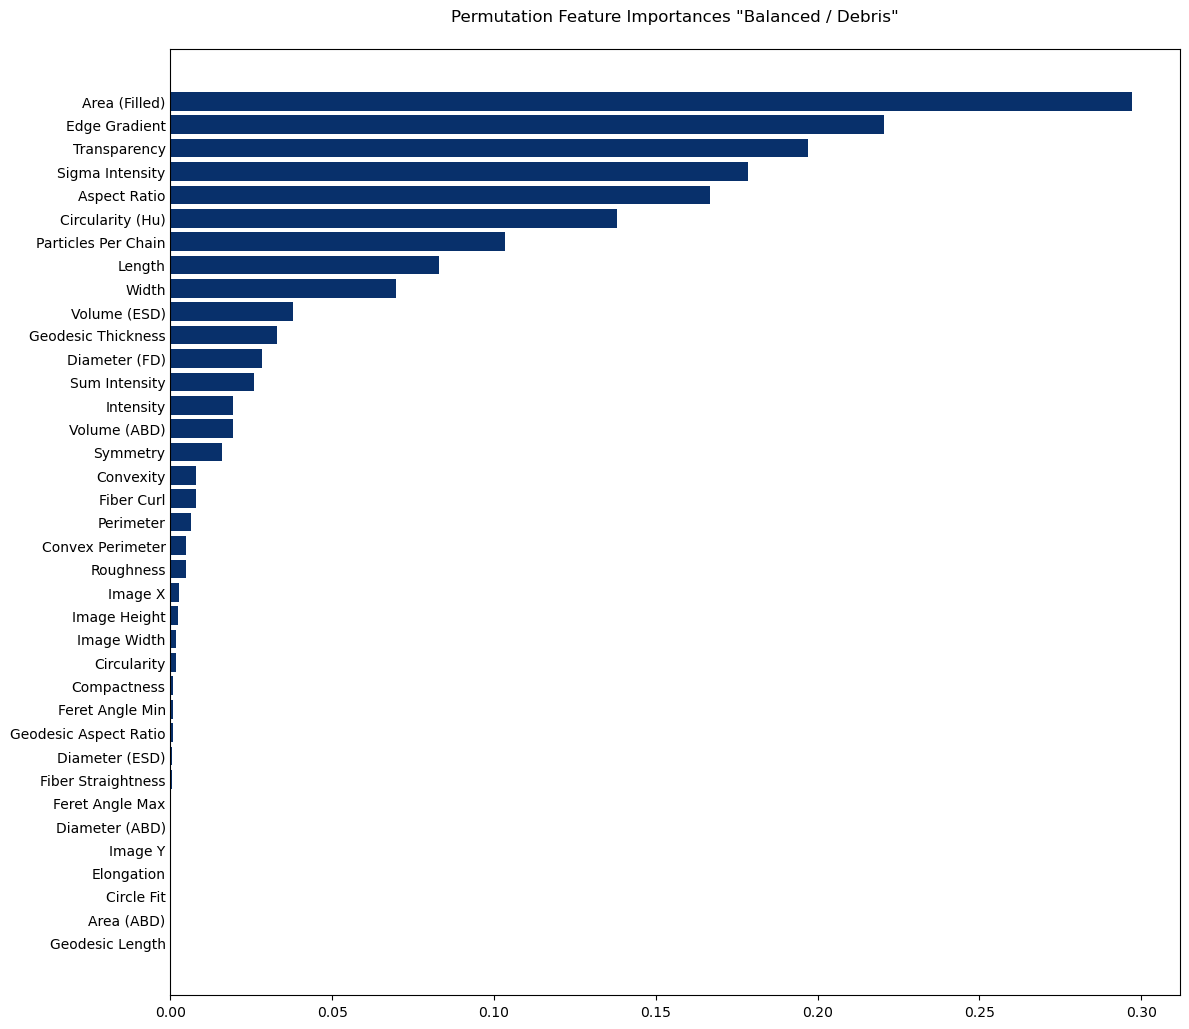

In [78]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, f1_score

f1_macro_scorer = make_scorer(f1_score, average='macro')

results = permutation_importance(tree, X_test, y_test, scoring=f1_macro_scorer)

permutation_importances = pd.Series(results.importances_mean, index=X.columns)
sorted_permutation_importances = permutation_importances.sort_values(ascending=False) 

colors = ['#08306b']  

fig, ax = plt.subplots(figsize=(12, 10))

bars = ax.barh(sorted_permutation_importances.index, sorted_permutation_importances.values,
               color=[colors[i % len(colors)] for i in range(len(sorted_permutation_importances))])

ax.invert_yaxis()
ax.set_xlim(left=0)
ax.tick_params(axis='y', which='both', length=0, labelsize=10)  
ax.tick_params(axis='x', which='both', labelsize=10)
plt.tight_layout() 
plt.title('Permutation Feature Importances "Balanced / Debris"', fontsize=12, pad=20)
plt.savefig('permutation_feature_importances_balanced_DEBRIS.png', dpi=300, bbox_inches='tight')
plt.show()

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.datasets import load_iris
import pandas as pd

cv_accuracies = []
cv_precisions = []
cv_recalls = []
cv_f1_scores = []

num_features_range = range(1, len(sorted_permutation_importances) + 1)

for num_features in num_features_range:
    selected_features = sorted_permutation_importances.index[:num_features]
    X_train_selected = X_train[selected_features]
    
    cut_clf = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=1)
    
    # Accuracy
    cv_accuracy = cross_val_score(cut_clf, X_train_selected, y_train, cv=5, scoring='accuracy').mean()
    cv_accuracies.append(cv_accuracy)
    
    # Precision
    cv_precision = cross_val_score(cut_clf, X_train_selected, y_train, cv=5, scoring='precision_macro').mean()
    cv_precisions.append(cv_precision)
    
    # Recall
    cv_recall = cross_val_score(cut_clf, X_train_selected, y_train, cv=5, scoring='recall_macro').mean()
    cv_recalls.append(cv_recall)
    
    # F1 Score
    cv_f1_score = cross_val_score(cut_clf, X_train_selected, y_train, cv=5, scoring='f1_macro').mean()
    cv_f1_scores.append(cv_f1_score)

In [82]:
train_accuracies = []
test_accuracies = []
train_precisions = []
test_precisions = []
train_recalls = []
test_recalls = []
train_f1_scores = []
test_f1_scores = []

sorted_features = sorted_permutation_importances.index.tolist()

num_features_range = range(1, len(sorted_features) + 1)

for num_features in num_features_range:
    selected_features = sorted_features[:num_features]
    
    X_train_drop = X_train[selected_features]
    X_test_drop = X_test[selected_features]
    
    cut_clf = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=1)
    cut_clf.fit(X_train_drop, y_train)
    
    y_train_pred = cut_clf.predict(X_train_drop)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision, train_recall, train_f1_score, _ = precision_recall_fscore_support(y_train, y_train_pred, average='macro')
    
    y_test_pred = cut_clf.predict(X_test_drop)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision, test_recall, test_f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred, average='macro')
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_precisions.append(train_precision)
    test_precisions.append(test_precision)
    train_recalls.append(train_recall)
    test_recalls.append(test_recall)
    train_f1_scores.append(train_f1_score)
    test_f1_scores.append(test_f1_score)

accuracy_diffs = np.array(train_accuracies) - np.array(test_accuracies)
precision_diffs = np.array(train_precisions) - np.array(test_precisions)
recall_diffs = np.array(train_recalls) - np.array(test_recalls)
f1_score_diffs = np.array(train_f1_scores) - np.array(test_f1_scores)

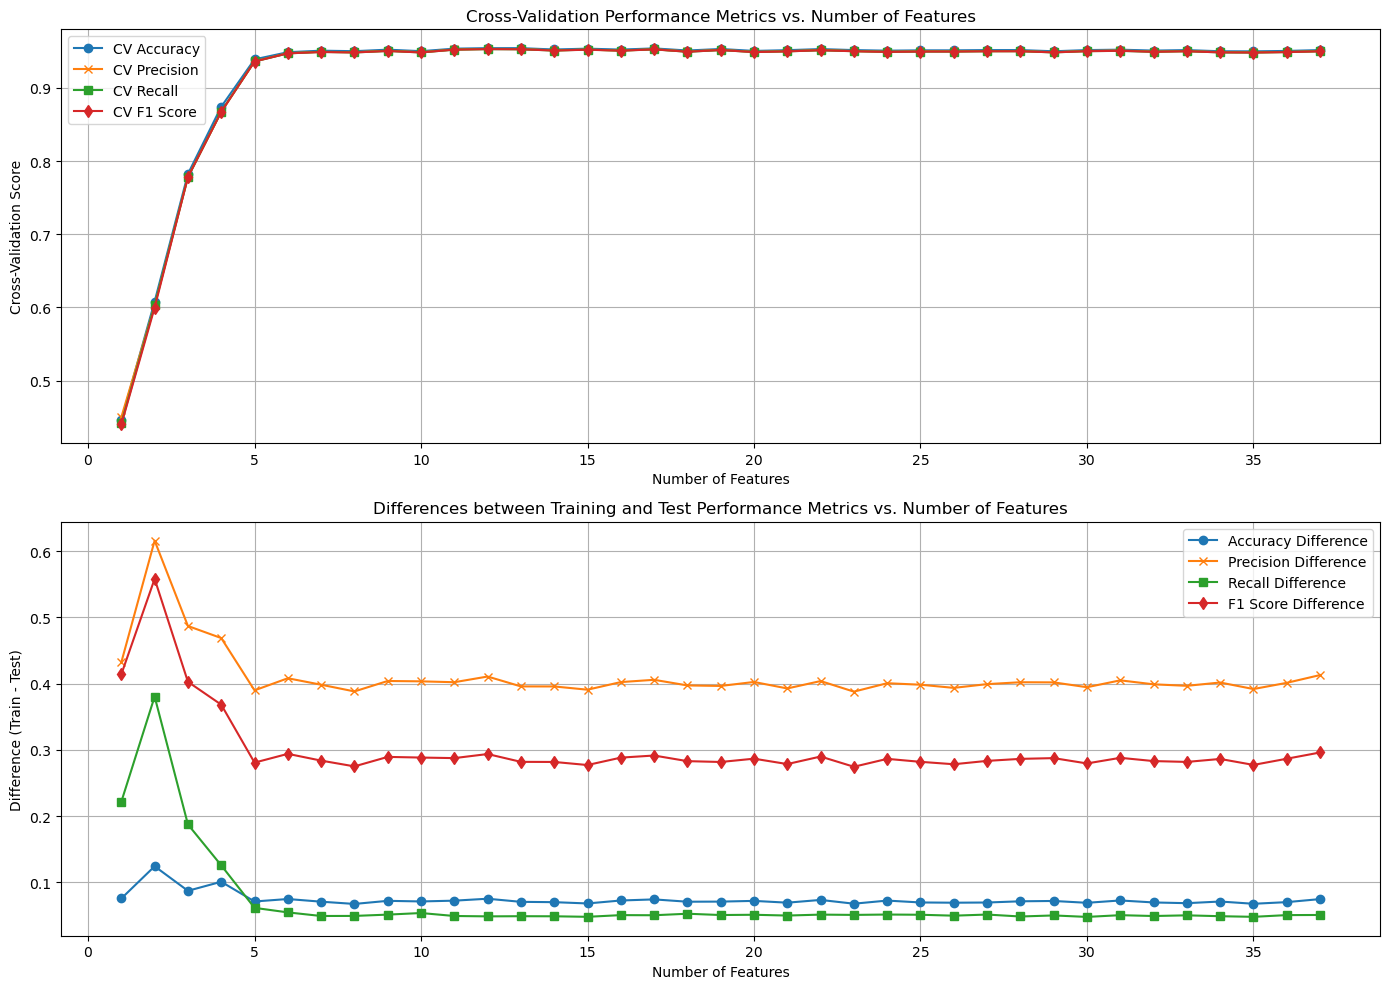

In [83]:
plt.figure(figsize=(14, 10))

# Plot Cross-Validation Metrics
plt.subplot(2, 1, 1)
plt.plot(num_features_range, cv_accuracies, label='CV Accuracy', linestyle='-', marker='o')
plt.plot(num_features_range, cv_precisions, label='CV Precision', linestyle='-', marker='x')
plt.plot(num_features_range, cv_recalls, label='CV Recall', linestyle='-', marker='s')
plt.plot(num_features_range, cv_f1_scores, label='CV F1 Score', linestyle='-', marker='d')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Performance Metrics vs. Number of Features')
plt.legend()
plt.grid(True)

# Plot Training and Test Metrics
plt.subplot(2, 1, 2)
plt.plot(num_features_range, accuracy_diffs, label='Accuracy Difference', linestyle='-', marker='o')
plt.plot(num_features_range, precision_diffs, label='Precision Difference', linestyle='-', marker='x')
plt.plot(num_features_range, recall_diffs, label='Recall Difference', linestyle='-', marker='s')
plt.plot(num_features_range, f1_score_diffs, label='F1 Score Difference', linestyle='-', marker='d')
plt.xlabel('Number of Features')
plt.ylabel('Difference (Train - Test)')
plt.title('Differences between Training and Test Performance Metrics vs. Number of Features')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [84]:
import pickle
# drop columns that have low feature importances from training and validation sets
selected_features = sorted_importances.index[:7]  # Select top 7 features based on importance
# Save the selected feature indices
with open('C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/features/features_balanced_DEBRIS.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

# Load selected features

In [85]:
# Load the saved feature indices
with open('C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/features/features_balanced_DEBRIS.pkl', 'rb') as f:
    selected_features = pickle.load(f)

In [86]:
X_train_drop = X_train[selected_features]
X_test_drop = X_test[selected_features]

# train new tree with cut training set
cut_clf = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=1)
cut_clf.fit(X_train_drop, y_train)

# validate with test set
print(metrics.accuracy_score(y_test, cut_clf.predict(X_test_drop)))

0.9318817811380038


In [87]:
print(metrics.classification_report(y_train, cut_clf.predict(X_train_drop)))
print(metrics.classification_report(y_test, cut_clf.predict(X_test_drop)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1128
           1       1.00      1.00      1.00      1285
           2       1.00      1.00      1.00      1285
           3       1.00      1.00      1.00      1285
           4       1.00      1.00      1.00      1343
           5       1.00      1.00      1.00      1285
           6       1.00      1.00      1.00      1052

    accuracy                           1.00      8663
   macro avg       1.00      1.00      1.00      8663
weighted avg       1.00      1.00      1.00      8663

              precision    recall  f1-score   support

           0       0.31      0.90      0.46       484
           1       0.42      0.92      0.58       299
           2       1.00      0.93      0.96     37275
           3       0.81      0.98      0.89      1104
           4       0.51      0.98      0.67       575
           5       0.64      0.98      0.78       550
           6       0.57 

#### Check for overfitting

In [88]:
print('Accuracy on the training set:', metrics.accuracy_score(y_train, cut_clf.predict(X_train_drop)))
print('Accuracy on the test set:', metrics.accuracy_score(y_test, cut_clf.predict(X_test_drop)))

print('F1 Score on the training set (macro):', metrics.f1_score(y_train, cut_clf.predict(X_train_drop), average='macro'))
print('F1 Score on the test set (macro):', metrics.f1_score(y_test, cut_clf.predict(X_test_drop), average='macro'))

print('F1 Score on the training set (weighted):', metrics.f1_score(y_train, cut_clf.predict(X_train_drop), average='weighted'))
print('F1 Score on the test set (weighted):', metrics.f1_score(y_test, cut_clf.predict(X_test_drop), average='weighted'))


Accuracy on the training set: 1.0
Accuracy on the test set: 0.9318817811380038
F1 Score on the training set (macro): 1.0
F1 Score on the test set (macro): 0.7227127619932568
F1 Score on the training set (weighted): 1.0
F1 Score on the test set (weighted): 0.9427933610801085


In [89]:
X_train = X_train_drop
X_test= X_test_drop
best_tree = cut_clf

### Hyperparameter Tuning

In [90]:
metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [91]:
# Randomized search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

params_dist = {
	'criterion': ['gini', 'entropy'],
	'max_depth': randint(low=1, high=100),
	'max_leaf_nodes': randint(low=500, high=50000),
    'min_samples_split': randint(low=2, high=200),
	'min_samples_leaf': randint(low=2, high=100)
}

results = []
for i in range(50):
    random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=1), params_dist, cv=7, scoring = 'f1_macro')
    random_search.fit(X_train, y_train)
    best_params_rand = random_search.best_params_
    best_params_rand['best_score_rand'] = random_search.best_score_
    results.append(best_params_rand)
    f"Run {i+1}: Best Parameters: {best_params_rand}"


results_df = pd.DataFrame(results)
results_df

,criterion,max_depth,max_leaf_nodes,min_samples_leaf,min_samples_split,best_score_rand
0,gini,86,31395,5,81,0.935090
1,gini,72,35543,39,77,0.933233
2,gini,67,8625,11,22,0.940767
3,gini,61,4009,9,11,0.941722
4,entropy,21,49266,57,96,0.925285
5,gini,67,16451,5,28,0.938428
6,gini,74,2990,51,56,0.924664
7,entropy,90,18176,19,44,0.939675
8,entropy,36,34016,50,104,0.927665
9,gini,27,24649,43,15,0.928960


In [92]:
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=1), params_dist, cv=7, random_state=1)
random_search.fit(X_train, y_train)
print(random_search.best_params_)
print(random_search.best_score_)

{'criterion': 'gini', 'max_depth': 58, 'max_leaf_nodes': 3061, 'min_samples_leaf': 2, 'min_samples_split': 62}
0.9376661521690338


In [93]:
best_tree = random_search.best_estimator_

# check performance of the tuned tree on the test set
print(metrics.classification_report(y_train, best_tree.predict(X_train)))
print(metrics.classification_report(y_test, best_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1128
           1       0.96      0.98      0.97      1285
           2       0.91      0.94      0.93      1285
           3       0.99      0.99      0.99      1285
           4       0.98      0.98      0.98      1343
           5       0.97      0.97      0.97      1285
           6       0.98      0.91      0.94      1052

    accuracy                           0.96      8663
   macro avg       0.96      0.95      0.96      8663
weighted avg       0.96      0.96      0.96      8663

              precision    recall  f1-score   support

           0       0.35      0.87      0.50       484
           1       0.34      0.98      0.50       299
           2       1.00      0.93      0.97     37275
           3       0.80      0.98      0.88      1104
           4       0.55      0.97      0.70       575
           5       0.64      0.96      0.77       550
           6       0.71 

In [94]:
random_search.best_params_

{'criterion': 'gini',
 'max_depth': 58,
 'max_leaf_nodes': 3061,
 'min_samples_leaf': 2,
 'min_samples_split': 62}

### save the trained and tuned tree as a file

In [95]:
from joblib import dump, load
dump(best_tree, 'C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/trees/tree_balanced_DEBRIS.joblib')

['C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/trees/tree_balanced_DEBRIS.joblib']

# Load the trained tree from file

In [96]:
from joblib import dump, load
best_tree = load('C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/trees/tree_balanced_DEBRIS.joblib')
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=58, max_leaf_nodes=3061, min_samples_leaf=2,
                       min_samples_split=62, random_state=1)

#### Check for overfitting again

In [97]:
print('Accuracy on the training set:', metrics.accuracy_score(y_train, best_tree.predict(X_train)))
print('Accuracy on the test set:', metrics.accuracy_score(y_test, best_tree.predict(X_test)))

print('F1 Score on the training set (macro):', metrics.f1_score(y_train, best_tree.predict(X_train), average='macro'))
print('F1 Score on the test set (macro):', metrics.f1_score(y_test, best_tree.predict(X_test), average='macro'))

print('F1 Score on the training set (weighted):', metrics.f1_score(y_train, best_tree.predict(X_train), average='weighted'))
print('F1 Score on the test set (weighted):', metrics.f1_score(y_test, best_tree.predict(X_test), average='weighted'))


Accuracy on the training set: 0.9569433221747663
Accuracy on the test set: 0.9364229957288036
F1 Score on the training set (macro): 0.9555987227253436
F1 Score on the test set (macro): 0.7316429086173196
F1 Score on the training set (weighted): 0.956912538512954
F1 Score on the test set (weighted): 0.9463024286648372


## Prediction on test set

In [99]:
# use model with test data
predictions = best_tree.predict(X_test)
print(metrics.classification_report(y_train, best_tree.predict(X_train)))
print(metrics.classification_report(y_test, best_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1128
           1       0.96      0.98      0.97      1285
           2       0.91      0.94      0.93      1285
           3       0.99      0.99      0.99      1285
           4       0.98      0.98      0.98      1343
           5       0.97      0.97      0.97      1285
           6       0.98      0.91      0.94      1052

    accuracy                           0.96      8663
   macro avg       0.96      0.95      0.96      8663
weighted avg       0.96      0.96      0.96      8663

              precision    recall  f1-score   support

           0       0.35      0.87      0.50       484
           1       0.34      0.98      0.50       299
           2       1.00      0.93      0.97     37275
           3       0.80      0.98      0.88      1104
           4       0.55      0.97      0.70       575
           5       0.64      0.96      0.77       550
           6       0.71 

In [100]:
predictions_decoded = label_encoder.inverse_transform(predictions)
predictions_decoded

array(['DEBRIS', 'LUCU', 'DEBRIS', ..., 'DEBRIS', 'DEBRIS', 'DEBRIS'],
      dtype=object)

In [101]:
unique_values, counts = np.unique(predictions_decoded, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

ANCR: 1198
ANLO: 860
DEBRIS: 34899
LUCU: 1354
NELU: 1013
TEMA: 824
TRSP: 590


In [102]:
from sklearn.metrics import classification_report

# test difference between untuned and tuned tree for test data
print('Classification report for the original tree:')
print()
print(metrics.classification_report(y_test, tree.predict(X_test_orig)))
print('Classification report for the tuned tree:')
print()
print(metrics.classification_report(y_test, best_tree.predict(X_test)))

with open('classification_report_balanced_DEBRIS.txt', 'w') as file:
    file.write(metrics.classification_report(y_test, best_tree.predict(X_test)))

Classification report for the original tree:

              precision    recall  f1-score   support

           0       0.31      0.90      0.46       484
           1       0.48      0.93      0.63       299
           2       1.00      0.93      0.96     37275
           3       0.80      0.98      0.88      1104
           4       0.57      0.97      0.72       575
           5       0.56      0.97      0.71       550
           6       0.50      0.96      0.65       451

    accuracy                           0.93     40738
   macro avg       0.60      0.95      0.72     40738
weighted avg       0.96      0.93      0.94     40738

Classification report for the tuned tree:

              precision    recall  f1-score   support

           0       0.35      0.87      0.50       484
           1       0.34      0.98      0.50       299
           2       1.00      0.93      0.97     37275
           3       0.80      0.98      0.88      1104
           4       0.55      0.97      0.70